In [1]:
from gdc.cms.estimation import dic_prediction
from gdc.utils import FigSave

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Loading dic_prediction from cache...


In [2]:
save_fig = FigSave()
save_fig.fig_path

'/home/sylvain857/Dropbox/Econ/papiers/gameTheory/generous_dynamic_contracting/datasets/france/figures'

In [3]:
df_predictions = pd.concat(dic_prediction, names=["year", "patient_id"]).reset_index()

In [4]:
df_predictions.head()

,year,patient_id,y,l1linear,l1RF
0,2008,00013D2EFD8E45D1,50.0,5.125039e-07,0.00
1,2008,00016F745862898F,700.0,4.371614e-07,0.00
2,2008,0001FDD721E223DC,0.0,4.383210e-07,0.00
3,2008,00021CA6FF03E670,0.0,4.476642e-07,0.00
4,2008,00024B3D2352D2D0,250.0,4.000000e+02,776.65


In [5]:
list_penalties = []
expenses = df_predictions['y'].sum()

for coef in np.linspace(0,.5, 50):
    this_df = df_predictions.copy()
    this_df['Dlin'] = (1-coef) * this_df['l1linear'] - this_df['y'] 
    this_df['DRF'] = (1-coef) * this_df['l1RF'] - this_df['y']
    penalties = this_df.groupby('patient_id')['DRF'].sum().clip(lower=0)
    pen = penalties.sum() 
    list_penalties.append([coef, pen, pen / expenses])


In [6]:
df_penalties = pd.DataFrame(list_penalties, columns=['coef', 'penalty', 'penalty / total expenses'])
df_penalties.set_index('coef', inplace=True)
df_penalties.head()

,penalty,penalty / total expenses
coef,,
0.000000,8.220536e+07,0.066200
0.010204,7.966888e+07,0.064158
0.020408,7.717494e+07,0.062149
0.030612,7.472261e+07,0.060174
0.040816,7.231163e+07,0.058233


In [7]:
def pct(y, pos):
    return f"{100*y:.1f}%"

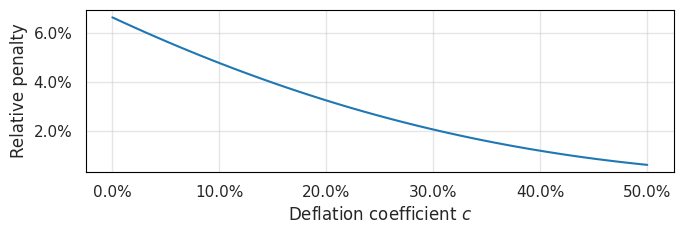

In [12]:
ax = df_penalties[['penalty / total expenses']].plot(figsize=(7, 2.5))
ax.set_ylabel("Relative penalty")
ax.legend().remove()
ax.grid(True, which="both", alpha=0.5)
ax.set_xlabel("Deflation coefficient $c$")
ax.yaxis.set_major_formatter(FuncFormatter(pct))
ax.xaxis.set_major_formatter(FuncFormatter(pct))



save_fig('relative_penalties_aligned_contracts_cms.pdf')